In [1]:
import pandas as pd

def load_data(path):
    return pd.read_csv(path)

In [2]:
fire_data = load_data('forestfires.csv')
fire_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [4]:
fire_data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d10ffd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f88c5f8>]], dtype=object)

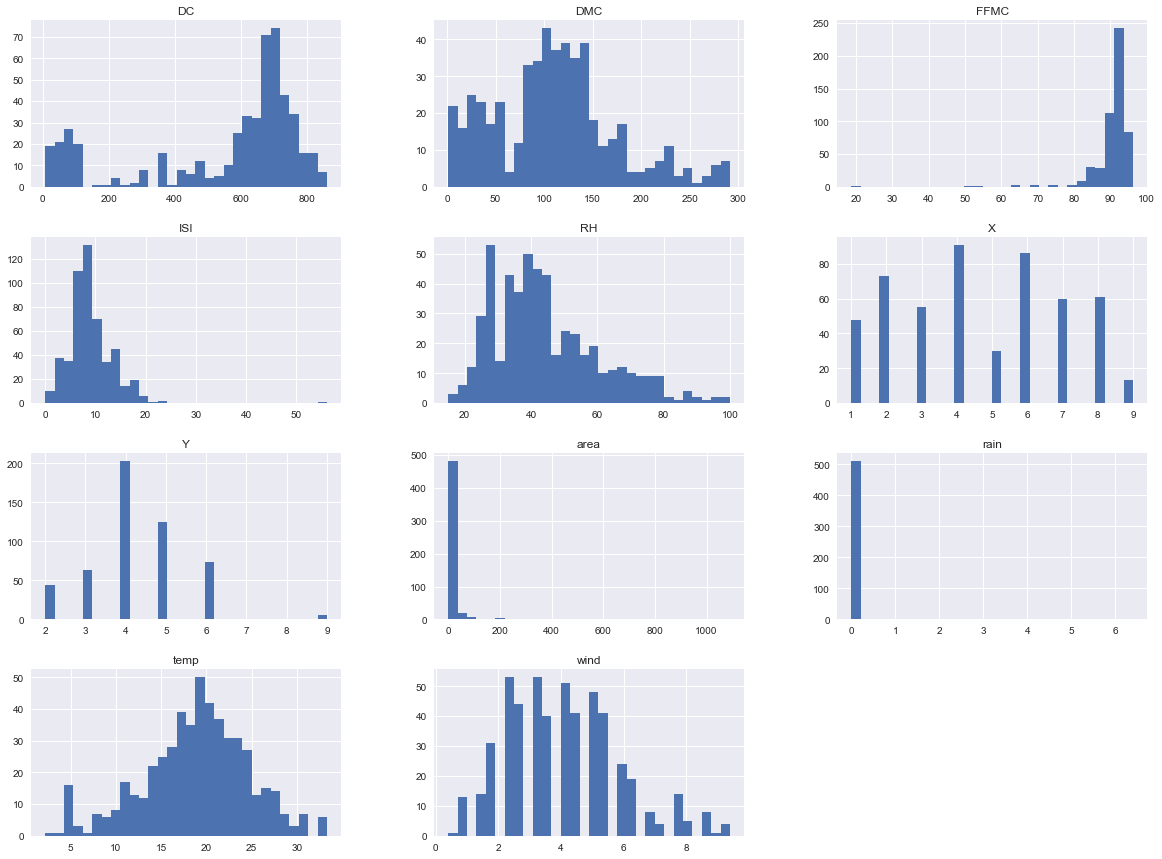

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn')
fire_data.hist(bins=30, figsize=(20,15))

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(fire_data, test_size=0.2, random_state=42)
work_set = train_set.copy()

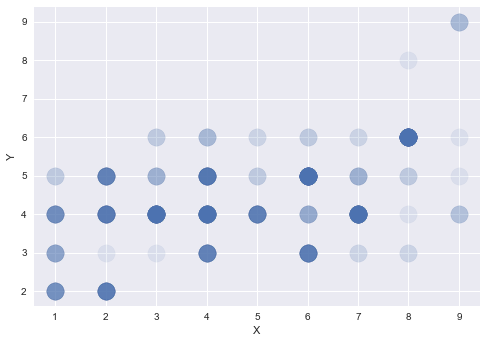

In [7]:
work_set.plot(kind='scatter', x='X', y='Y', alpha=0.1, s=300)

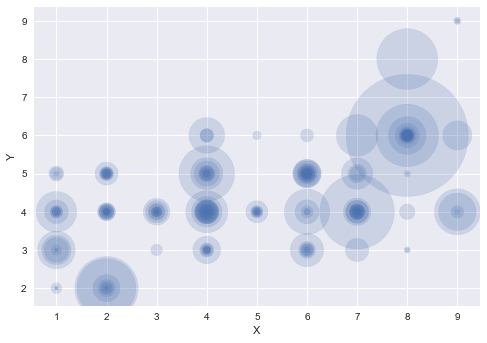

In [8]:
work_set.plot(kind='scatter', x='X', y='Y', alpha=0.2, s=20*work_set['area'])

In [9]:
corr_matrix = work_set.corr()
corr_matrix['area'].sort_values(ascending=False)

area    1.000000
DMC     0.115296
temp    0.100529
X       0.097316
Y       0.064545
FFMC    0.048985
DC      0.048709
ISI     0.037799
wind    0.012684
rain   -0.005113
RH     -0.057473
Name: area, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1129b96d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113197d30>]], dtype=object)

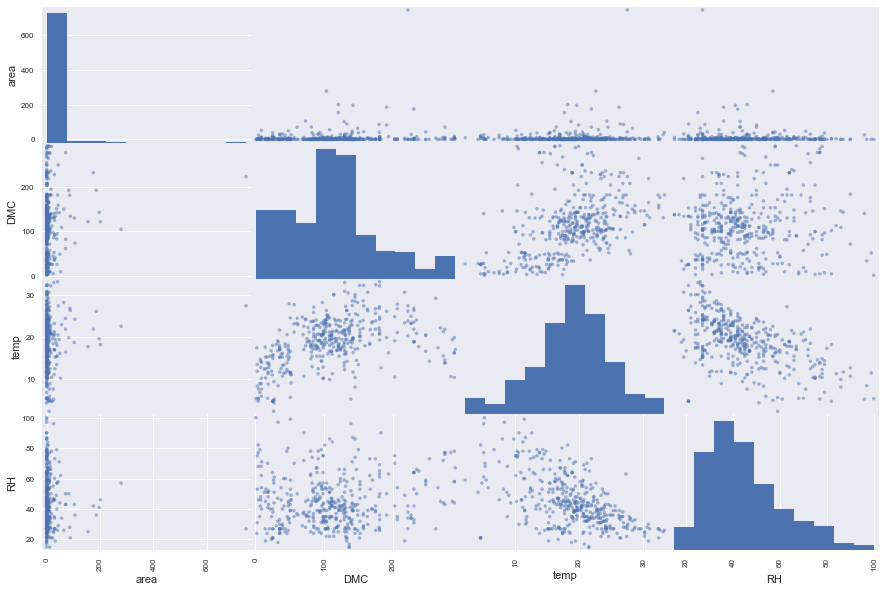

In [10]:
from pandas.plotting import scatter_matrix

attributes = ['area', 'DMC', 'temp', 'RH']
scatter_matrix(work_set[attributes], figsize=(15,10))

In [11]:
fires = work_set.drop('area', axis=1)
fires_labels = work_set['area'].copy()

In [12]:
fires['month'].unique()

array(['sep', 'aug', 'feb', 'mar', 'oct', 'apr', 'dec', 'jul', 'jun',
       'jan', 'may', 'nov'], dtype=object)

In [13]:
fires['day'].unique()

array(['sat', 'mon', 'tue', 'sun', 'fri', 'thu', 'wed'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelBinarizer

month_encoder = LabelBinarizer()
day_encoder = LabelBinarizer()

months = fires['month']
days = fires['day']

month_1hot = month_encoder.fit_transform(months)
day_1hot = day_encoder.fit_transform(days)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_features = fires.drop(['month', 'day'], axis=1)
scaled_features = scaler.fit_transform(numerical_features)

In [19]:
scaled_features

array([[ -2.88472000e-01,  -1.09485913e+00,   2.80285578e-01, ...,
         -1.05941934e+00,   1.63124094e-03,  -6.78170911e-02],
       [ -2.88472000e-01,  -2.66696454e-01,   6.16522396e-02, ...,
         -3.35214892e-01,  -1.00892252e+00,  -6.78170911e-02],
       [ -1.16128472e+00,   5.61466218e-01,   2.63467629e-01, ...,
          1.47588074e-01,   1.63124094e-03,  -6.78170911e-02],
       ..., 
       [ -1.16128472e+00,  -1.92302180e+00,   2.63467629e-01, ...,
          6.90741409e-01,  -5.03645641e-01,  -6.78170911e-02],
       [ -1.16128472e+00,   5.61466218e-01,   4.48342905e-02, ...,
          3.88989556e-01,  -1.23349003e+00,  -6.78170911e-02],
       [ -1.16128472e+00,  -2.66696454e-01,   7.17552255e-01, ...,
         -2.74864521e-01,   1.63124094e-03,  -6.78170911e-02]])

In [169]:
from sklearn.base import BaseEstimator, TransformerMixin

class AttributeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

class CustomBinarizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None,**fit_params):
        return self
    def transform(self, X):
        return MultiLabelBinarizer().fit_transform(X)

In [196]:
from sklearn.pipeline import Pipeline

numerical_attributes = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
categorical_attributes = ['month', 'day']

numerical_pipeline = Pipeline([
    ('selector', AttributeSelector(numerical_attributes)),
    ('standardize', StandardScaler()),
])
categorical_pipeline = Pipeline([
    ('selector', AttributeSelector(categorical_attributes)),
    ('encode', CustomBinarizer()),
])

In [172]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list= [
    ('numerical_pipeline', numerical_pipeline),
    ('categorical_pipeline', categorical_pipeline),
])

In [173]:
fires_transformed = full_pipeline.fit_transform(fires)